## Author : Om Garg

## Prediction using Supervised Machine Learning

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df_score_data = pd.read_csv(url)
print("Data imported successfully")

df_score_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df_score_data.shape

(25, 2)

From the above command we can say that this dataset contains 25 rows and 2 colums.

As we can see that there only features, therefore we can do Bivariate analysis directly.

## Bivariate Analysis

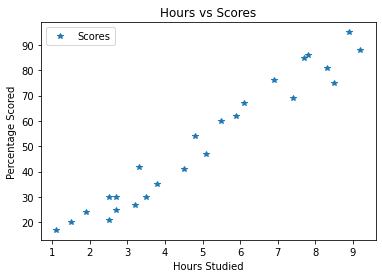

In [4]:
df_score_data.plot(x = 'Hours', y = 'Scores', style = '*')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

From the graph above, we can clearly see that there is a positive linear correlation between the number of hours studied and percentage of score.

## Preparaing Data

 Now we will divide our data into features and labels

In [5]:
x = df_score_data.iloc[:,:1].values 

Variable x contains all the values of "Hours" tuple from the dataset.

In [6]:
y = df_score_data.iloc[:,1:].values

Variable y contains all the values of "Scores" tuple from the dataset.

Now that we have our features and labels we can split the data into train and test sets using train_test_split() method of Scikit-Learn's built-in.

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

We have chosen 80% of the data for training purpose and 20% of the data for testing purpose

## Training the Model

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In this case we will train the data using Linear Regression.
And this can be done using sklearn library.

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Model has been trained!!!")

Model has been trained!!!


Since we have our trained model, we will plot the Tested Data and Regression Line

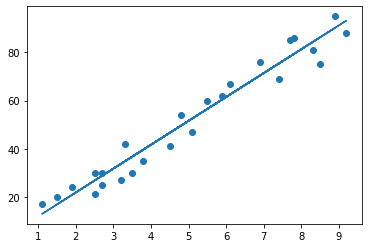

In [9]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Making Prediction

Now we have our trained model, it's time to predict values using the model

In [10]:
print(x_test)
y_predict = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In the above step we have tested our model using values of x_test.

And now we will compare predicted values with y_test.

In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({"Actual": [y_test[0],y_test[1],y_test[2],y_test[3],y_test[4]], "Predicted": [y_predict[0],y_predict[1],y_predict[2],y_predict[3],y_predict[4]]})
df 

,Actual,Predicted
0,[20],[16.884144762398048]
1,[27],[33.73226077948985]
2,[69],[75.35701799818723]
3,[30],[26.79480124304028]
4,[62],[60.49103327722388]


## What will be the predicted score if a student studies for 9.25 hrs/ day?

In [12]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = [[93.69173249]]


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975
